## 이미지 분류(CNN)

In [5]:
# 라이브러리
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

# 데이터
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

# 정규화
X_train, X_test = X_train / 255.0, X_test / 255.0

# 모델
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3,), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(10, activation="sigmoid")
])

In [8]:
# 컴파일
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [10]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9324 - loss: 0.1838 - val_accuracy: 0.9103 - val_loss: 0.2486
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9383 - loss: 0.1673 - val_accuracy: 0.9042 - val_loss: 0.2651
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9458 - loss: 0.1470 - val_accuracy: 0.9091 - val_loss: 0.2626
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9489 - loss: 0.1346 - val_accuracy: 0.9093 - val_loss: 0.2616
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9551 - loss: 0.1194 - val_accuracy: 0.9117 - val_loss: 0.2700
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 313s 167ms/step - accuracy: 0.9598 - loss: 0.1109 - val_accuracy: 0.9065 - val_loss: 0.3113
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9624 - loss: 0.1008 - val_accuracy: 0.9103 - val_loss: 0.3160
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9693 - loss

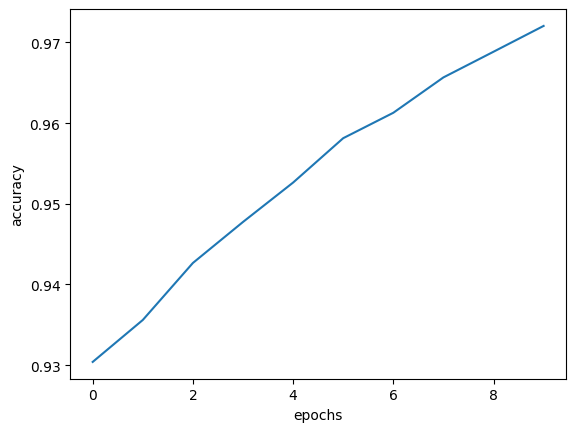

In [11]:
# 학습 정확도
plt.plot(history.history["accuracy"], label="acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

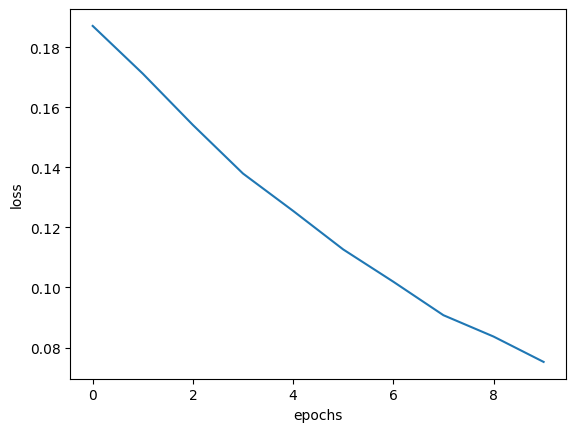

In [12]:
plt.plot(history.history["loss"], label="loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()